<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


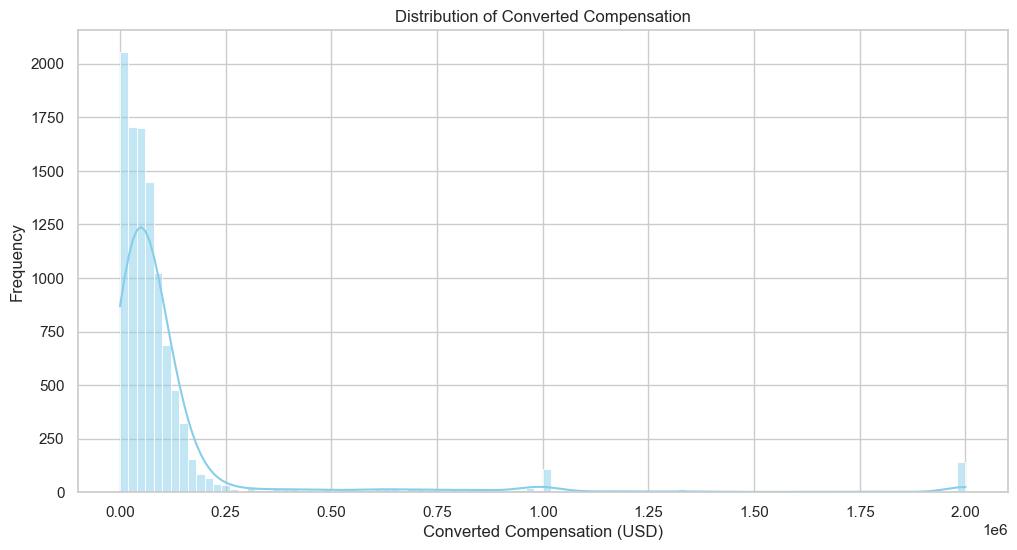

In [3]:
# your code goes here

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the distribution curve
sns.histplot(df['ConvertedComp'], kde=True, bins=100, color='skyblue')

plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')

plt.show()



Plot the histogram for the column `ConvertedComp`.


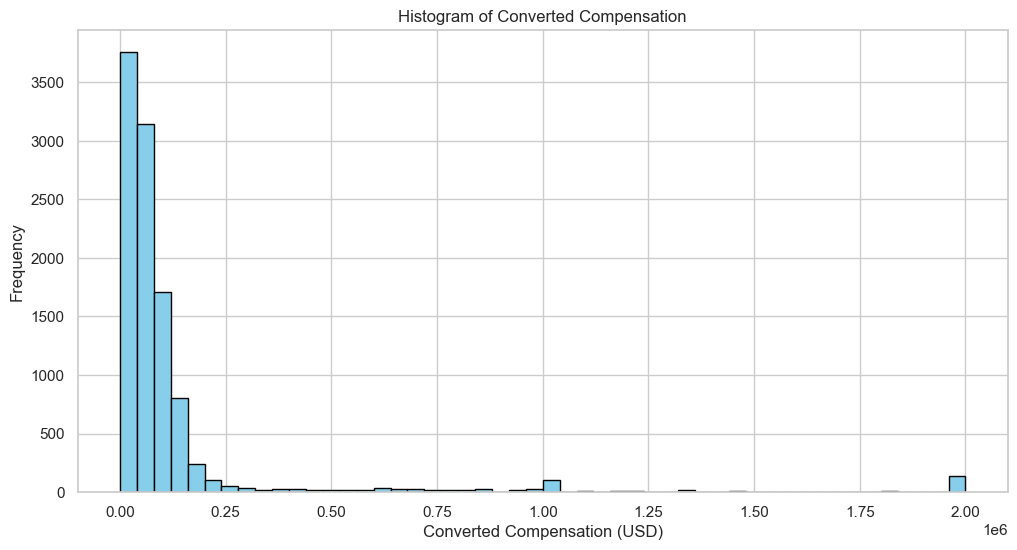

In [4]:
# your code goes here

plt.figure(figsize=(12, 6))

# Plotting the histogram
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')

plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
import numpy as np

median_converted_comp = np.median(df['ConvertedComp'])

print(f"The median of ConvertedComp is: {median_converted_comp}")


The median of ConvertedComp is: nan


In [16]:
# Calculate the median of the 'Age' column
median_age = df['Age'].median()

# Display the median age
print(f"The median age of survey respondents is: {median_age}")


The median age of survey respondents is: 29.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"The number of responders identifying only as a Man is: {man_count}")


The number of responders identifying only as a Man is: 10480


In [17]:
# Filter the DataFrame to include only respondents who identified as 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for women respondents
median_comp_woman = woman_df['ConvertedComp'].median()

# Display the median ConvertedComp for women respondents
print(f"The median ConvertedComp of respondents who identified as 'Woman' is: {median_comp_woman}")


The median ConvertedComp of respondents who identified as 'Woman' is: 57708.0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
woman_median_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp for responders identifying only as a Woman is: {woman_median_comp}")


The median ConvertedComp for responders identifying only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print("Five-number summary for the column Age:")
print("Minimum:", age_summary['min'])
print("Q1 (25th percentile):", age_summary['25%'])
print("Median (50th percentile):", age_summary['50%'])
print("Q3 (75th percentile):", age_summary['75%'])
print("Maximum:", age_summary['max'])


Five-number summary for the column Age:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


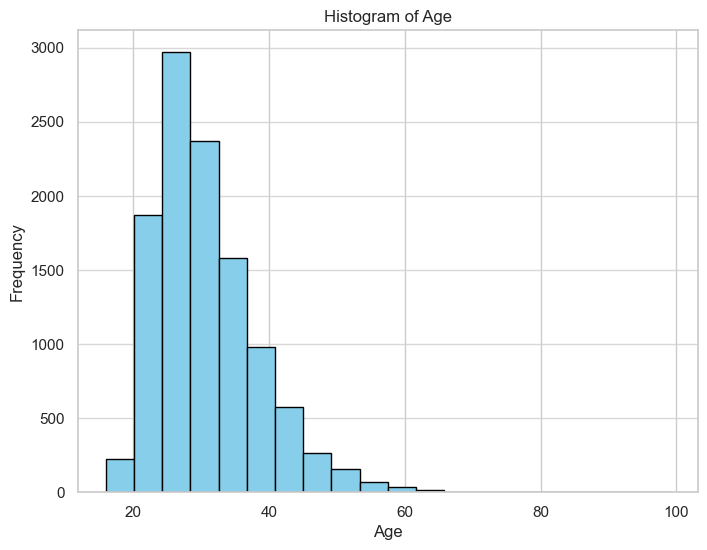

In [9]:
# your code goes here
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


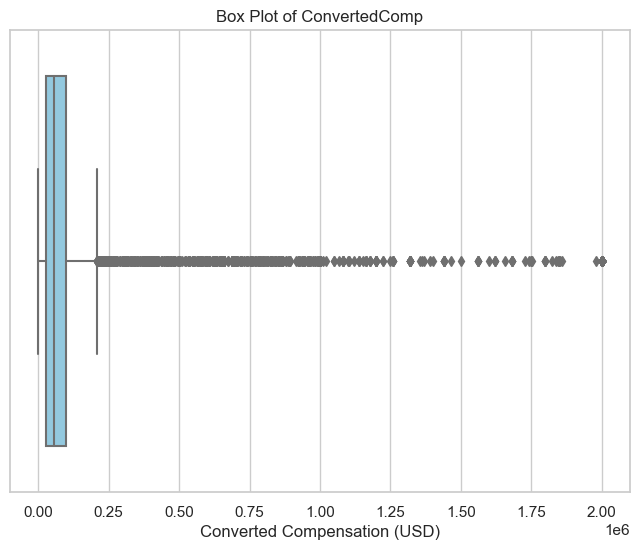

In [10]:
# your code goes here

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a box plot for ConvertedComp
sns.boxplot(x=df['ConvertedComp'], color='skyblue')

# Set plot labels
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')

# Display the plot
plt.show()


Number of outliers below Q1: 0


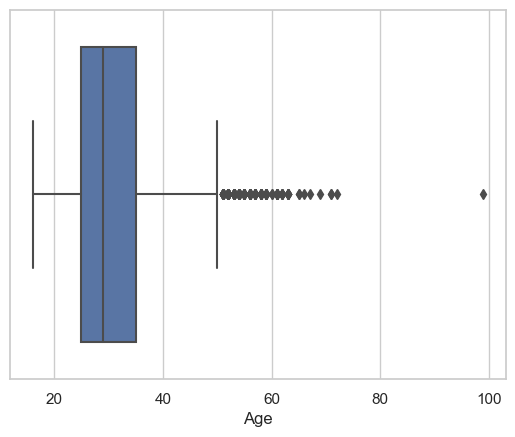

In [22]:
# What is the mean ConvertedComp after removing outliers
sns.boxplot(x=df['Age'])

# Calculate Q1 and IQR
Q1 = df['Age'].quantile(0.25)
IQR = df['Age'].quantile(0.75) - Q1

# Calculate lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Print the number of outliers below Q1
print(f"Number of outliers below Q1: {len(outliers_below_Q1)}")

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
# Calculate the interquartile range (IQR)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")


Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
# Calculate upper and lower bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp: {num_outliers}")


Number of outliers in ConvertedComp: 879


In [19]:
median_before_outliers = df['ConvertedComp'].median()
print(f"The median ConvertedComp before removing outliers is: {median_before_outliers}")


The median ConvertedComp before removing outliers is: 57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here
# Remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
df_no_outliers.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [21]:
# Using the new dataframe without outliers named df_no_outliers
median_after_outliers = np.median(df_no_outliers['ConvertedComp'])
print(f"The median ConvertedComp after removing outliers is: {median_after_outliers}")

The median ConvertedComp after removing outliers is: 52704.0


In [27]:
# Using new dataframe without outliers
mean_after_outliers = np.mean(df_no_outliers['ConvertedComp'])

# Print the mean ConvertedComp after removing outliers
print(f"Mean ConvertedComp after removing outliers: {mean_after_outliers}")


Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation values for 'Age' column
age_correlation = correlation_matrix['Age'].drop('Age')

# Display the correlation values
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


C:\Users\SALIFU\AppData\Local\Temp\ipykernel_6516\3658233636.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
